<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Prerequisites" data-toc-modified-id="Prerequisites-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Prerequisites</a></span></li><li><span><a href="#Getting-Data" data-toc-modified-id="Getting-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Getting Data</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Create-Model" data-toc-modified-id="Create-Model-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Create Model</a></span></li><li><span><a href="#Fit-to-Data" data-toc-modified-id="Fit-to-Data-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Fit to Data</a></span></li><li><span><a href="#Training-Statistics" data-toc-modified-id="Training-Statistics-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Training Statistics</a></span></li></ul></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Evaluation</a></span><ul class="toc-item"><li><span><a href="#Test-Set-Evaluation" data-toc-modified-id="Test-Set-Evaluation-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Test Set Evaluation</a></span></li><li><span><a href="#Saving-Model" data-toc-modified-id="Saving-Model-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Saving Model</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Neural Networks

## Prerequisites

In [ ]:
import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils.np_utils import to_categorical
from keras import metrics

import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

%matplotlib inline

## Getting Data
In this notebook we will work with classical [MNIST](http://yann.lecun.com/exdb/mnist/) dataset, which consists of 60,000 28x28 grayscale images of the 10 handwritten digits. The task is to classify image to any of ten classes.

In [2]:
# Download mnist dataset
(X_train, y_train), (X_test, y_test)  = mnist.load_data()
print("Train data : {}".format(X_train.shape))
print("Test data : {}".format(X_test.shape))

Train data : (60000, 28, 28)
Test data : (10000, 28, 28)


- 60000 - number of training examples
- 10000 - number of test examples
- (28,28) - image size

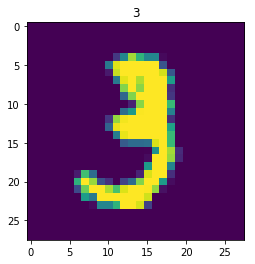

In [3]:
# Visualize
plt.imshow(X_train[10])
plt.title(y_train[10]);

## Preprocessing

We are working with image data and each pixel is coded by R, G, B color intensity as an integer value between 0 and 255. Thus, simple division by 255 will give us normalazied values.

In [4]:
# Normalize Data
X_train = X_train/255.
X_test = X_test/255.

In [5]:
# Data Reshape - append number of channels
n_train, h, w = X_train.shape
n_test = X_test.shape[0]

X_train = X_train.reshape(n_train, h * w)
X_test = X_test.reshape(n_test, h * w)

In [6]:
# One hot encoding for label
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

## Modeling

Now we'll create a simple model with single layer and softmax activation. 

### Create Model

Here we'll use create model with Keras' [Sequential class](https://keras.io/getting-started/sequential-model-guide/). It is an easiest way to build a model, presented as a linear stack of layers.

In [7]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_shape= (784,),  activation="softmax"))
    return model

In [8]:
# Create model and look at the architecture
model = create_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Training parameters
batch_size = 128
epochs = 10

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=[metrics.categorical_accuracy])

### Fit to Data

In [10]:
# Fit 
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs);

Epoch 1/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.6868 - categorical_accuracy: 0.8294
Epoch 2/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.3623 - categorical_accuracy: 0.9022
Epoch 3/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.3195 - categorical_accuracy: 0.9120
Epoch 4/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.2997 - categorical_accuracy: 0.9167
Epoch 5/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.2880 - categorical_accuracy: 0.9203
Epoch 6/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.2801 - categorical_accuracy: 0.9217
Epoch 7/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.2739 - categorical_accuracy: 0.9238
Epoch 8/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.2694 - categorical_accuracy: 0.9248
Epoch 9/10
60000/60000 [==============================] - 2s 35u

### Training Statistics

In [11]:
history.params

{'batch_size': 128,
 'epochs': 10,
 'steps': None,
 'samples': 60000,
 'verbose': 1,
 'do_validation': False,
 'metrics': ['loss', 'categorical_accuracy']}

In [12]:
loss_history = history.history["loss"]
acc_history = history.history["categorical_accuracy"]

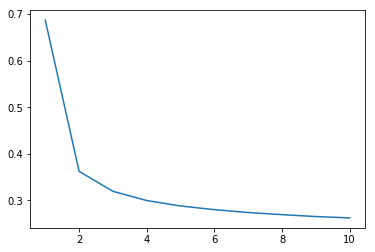

In [13]:
# Loss visualization
plt.plot(range(1, epochs + 1), loss_history);

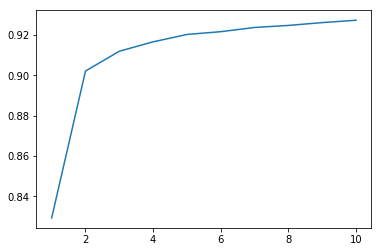

In [14]:
# Accuracy visualization
plt.plot(range(1, epochs + 1), acc_history);

## Evaluation

### Test Set Evaluation

In [15]:
# Let's evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test loss: {}".format(test_loss))
print("Test accuracy: {}".format(test_accuracy))

10000/10000 [==============================] - 0s 48us/step
Test loss: 0.26582396190166474
Test accuracy: 0.9254


### Saving Model

In [16]:
# Save  model
model.save_weights("weights.json")
model.save("model.hd5")

In [18]:
! ls

model.hd5  NN.ipynb  README.md	weights.json


You can see the file with weights and file with model architecture

## Conclusion

This notebooks gives a sense of building a simple and shallow neural network using Keras framework. In fact, such simple networks are rarely used in practice and popular deep neural networks are much bigger and train longer.
